In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import warnings
import matplotlib.pyplot as plt


#warnings.filterwarnings('ignore')
%matplotlib inline

In [444]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [236]:
df_train.shape


(891, 12)

In [237]:
df_test.shape

(418, 11)

In [238]:
#number of rows with missing values in the dataframe! 
df_train.isnull().values.ravel().sum()


866

In [239]:
df_train.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [240]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [241]:
def missing_percentage(series):
    num = series.isnull().sum()
    den = series.count()
    return 100*(num/den)

In [242]:
missing_percentage(df_train)

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             24.789916
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin          336.764706
Embarked         0.224972
dtype: float64

In [243]:
df_train['Ticket'].value_counts()

347082               7
1601                 7
CA. 2343             7
3101295              6
CA 2144              6
347088               6
382652               5
S.O.C. 14879         5
W./C. 6608           4
347077               4
17421                4
2666                 4
19950                4
349909               4
113760               4
113781               4
4133                 4
LINE                 4
PC 17757             4
F.C.C. 13529         3
C.A. 34651           3
PC 17760             3
248727               3
239853               3
35273                3
230080               3
13502                3
347742               3
29106                3
PC 17755             3
                    ..
A/4. 34244           1
349216               1
PC 17595             1
14311                1
348121               1
347063               1
SOTON/O.Q. 392087    1
SOTON/OQ 392086      1
347468               1
250653               1
3474                 1
7553                 1
A/4 45380  

In [244]:
df_train.loc[df_train['Ticket'] == '2666']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.00,0,3,2666,19.2583,NaN,C


In [245]:
df_train.loc[df_train['Ticket'] == '347082']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [328]:
#df_train = df_train.drop('Cabin', axis = 1)

In [247]:
len(df_train['Name'].str.split(',').str[0])

891

In [248]:
len(set(df_train['Name'].str.split(',').str[0]))

667

In [249]:
df_train['Name'] = df_train['Name'].str.split(',').str[0]#.value_count()

In [250]:
#df_train['Name'].value_counts()

In [251]:
#df_train = df_train.drop(labels = 'Name', axis = 1)

In [252]:
#len(df_train['Cabin'])

In [297]:
y = df_train['Survived']
y = y.astype('int64')

In [254]:
le = preprocessing.LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train.Sex.values)
df_train['Ticket'] = le.fit_transform(df_train.Ticket.values)
df_train['Name'] = le.fit_transform(df_train.Name.values)
df_train['Embarked'] = le.fit_transform(df_train['Embarked'].astype(str).values)

In [259]:
pd.drop?

Object `pd.drop` not found.


In [261]:
x = df_train.drop(labels = 'Survived', axis = 1 )

In [265]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imp.fit_transform(x)

In [323]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
x_transformed = pca.fit_transform(x)


In [324]:
print(pca.explained_variance_ratio_)

[0.45487329 0.27775175]


In [332]:
y = df_train['Survived']
set(y.values)

{0, 1}

In [336]:
x_transformed.shape

(891, 2)

In [333]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


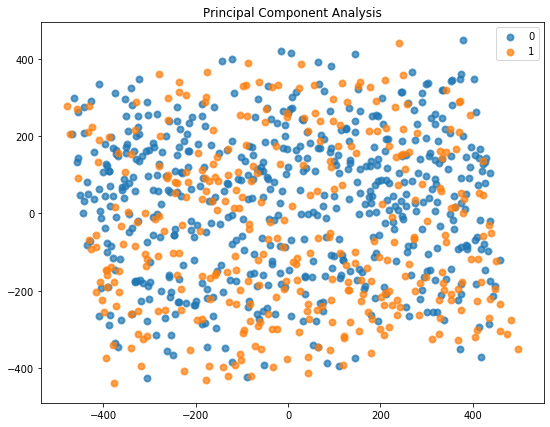

In [334]:

plt.figure(figsize=(9,7))
lw = 2

for i, target_name in zip([0, 1], np.unique(y)):
    plt.scatter(x_transformed[y == i, 0], x_transformed[y == i, 1], alpha=.7, lw=lw,
                label=target_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('Principal Component Analysis')
plt.show()


In [419]:
#from sklearn.manifold import TSNE

In [307]:
result=pd.DataFrame(x_transformed, columns=['PCA%i' % i for i in range(3)], index=df_train.index)
#result

Text(0.5, 0.92, 'PCA on the iris data set')

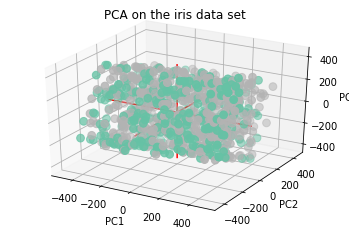

In [320]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
#plt.show()


In [343]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [420]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X_train)
X_embedded

array([[-10.290987 , -16.804478 ],
       [ 17.230442 ,  18.633913 ],
       [ 22.657299 ,  13.184055 ],
       ...,
       [ 14.870251 ,  24.348139 ],
       [-27.492737 ,  -8.946955 ],
       [  1.4584534, -15.265085 ]], dtype=float32)

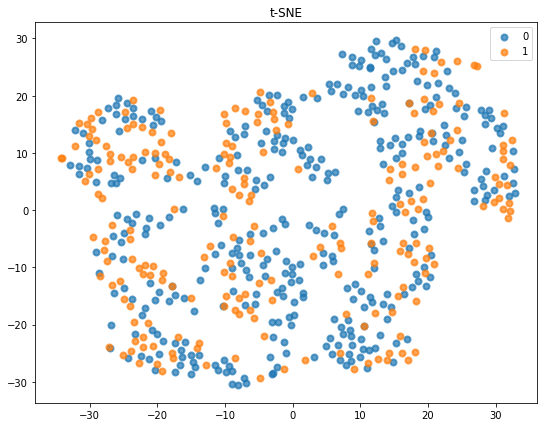

In [426]:
plt.figure(figsize=(9,7))
lw = 2

for i, target_name in zip([0, 1], np.unique(y_train)):
    plt.scatter(X_embedded[y_train == i, 0], X_embedded[y_train == i, 1], alpha=.7, lw=lw,
                label=target_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('t-SNE')
plt.show()


In [400]:
clf = tree.DecisionTreeClassifier(max_depth =3)
clf = clf.fit(X_train, y_train)

In [401]:
y_pred = clf.predict(X_test)

In [402]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8203389830508474

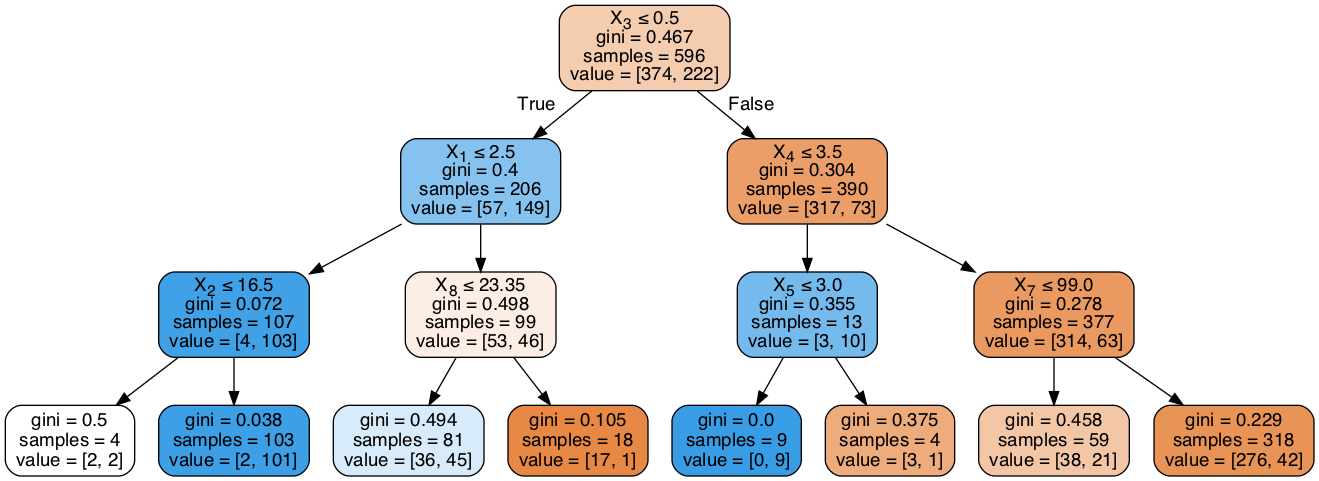

In [403]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [438]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)



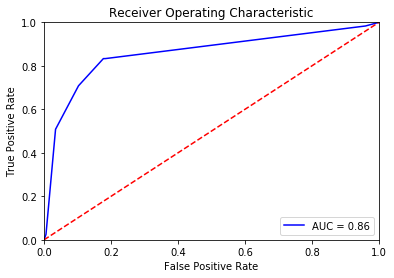

In [439]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

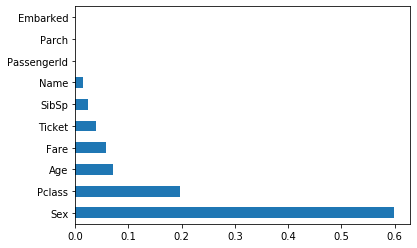

In [404]:
feat_importances = pd.Series(clf.feature_importances_,index=df_train.drop(labels= 'Survived', axis = 1).columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [415]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)




ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [450]:
#probs#[:,1]

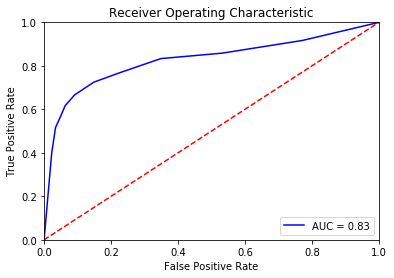

In [446]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [416]:
feat_importances = pd.Series(model.feature_importances_,index=df_train.drop(labels= 'Survived', axis = 1).columns)
#len(df_train.columns)
#model.feature_importances_
#df_train.drop(labels= 'Survived', axis = 1).columns


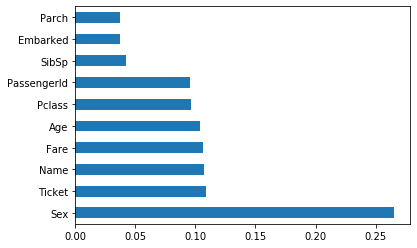

In [417]:
#feat_importances = pd.Series(model.feature_importances_,index=df_train.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [418]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.8101694915254237

In [381]:
modelgc = GradientBoostingClassifier()
modelgc.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [384]:
y_pred = modelgc.predict(X_test)
accuracy_score(y_test, y_pred)


0.8271186440677966

In [385]:
feat_importances = pd.Series(modelgc.feature_importances_,index=df_train.drop(labels= 'Survived', axis = 1).columns)


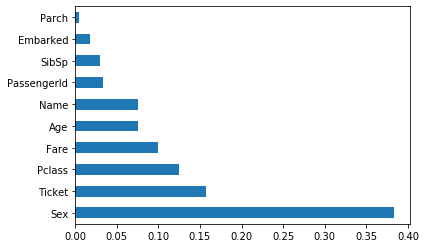

In [386]:
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

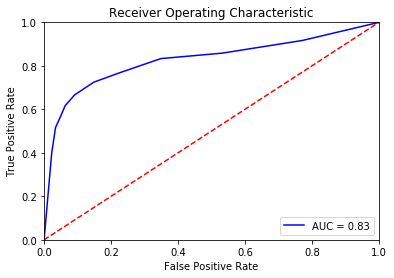

In [451]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = modelgc.predict_proba(X_test)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()